<a href="https://colab.research.google.com/github/Sand08/Statistics-and-Machine-Learning/blob/main/SML_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset using sklearn
iris = load_iris()

# Convert the dataset to a pandas DataFrame
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) as a column to the DataFrame
iris_data['species'] = iris.target

# Mapping species to their actual names
iris_data['species'] = iris_data['species'].map(dict(enumerate(iris.target_names)))

# Display the first few rows of the dataset to confirm it loaded correctly
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**T-Test**

T-Statistic: -1.55, P-Value: 0.128
Fail to reject the null hypothesis: No significant difference.


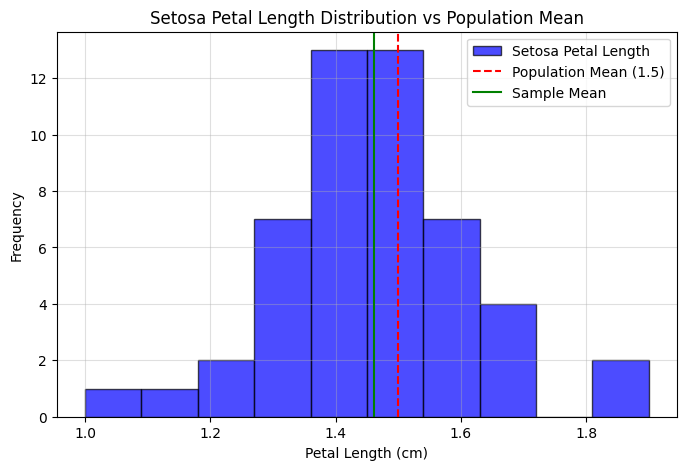

In [4]:
import numpy as np
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

# Hypothesis Testing for Iris Dataset (Petal Length of Setosa vs Population Mean)
np.random.seed(42)

# Extract petal length for Setosa species
setosa_petal_length = iris_data[iris_data['species'] == 'setosa']['petal length (cm)']

# Population mean (hypothetical value for comparison)
population_mean = 1.5

# Perform a one-sample t-test
t_stat, p_value = ttest_1samp(setosa_petal_length, population_mean)

# Print the t-test results
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Sample mean is significantly different from population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Plot the sample distribution vs population mean
plt.figure(figsize=(8, 5))
plt.hist(setosa_petal_length, bins=10, alpha=0.7, color='blue', edgecolor='black', label='Setosa Petal Length')
plt.axvline(population_mean, color='red', linestyle='--', label=f'Population Mean ({population_mean})')
plt.axvline(np.mean(setosa_petal_length), color='green', linestyle='-', label='Sample Mean')
plt.title('Setosa Petal Length Distribution vs Population Mean')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


The one-sample **t-test** results for comparing the mean petal length of Setosa to a hypothetical population mean of 1.5 are:

T-Statistic: -1.55
P-Value: 0.128

**Interpretation**:
The p-value (0.128) is greater than the common significance level (
α=0.05).

We **fail to reject the null hypothesis**, meaning there is no significant difference between the sample mean petal length of Setosa and the hypothetical population mean.

The histogram illustrates the distribution of Setosa's petal lengths:

The **red dashed line **represents the hypothetical population mean (1.5).
The **green solid line** represents the sample mean.

**Z-Test**

Z-Statistic: 0.12, P-Value: 0.904
Fail to reject the null hypothesis: No significant difference.


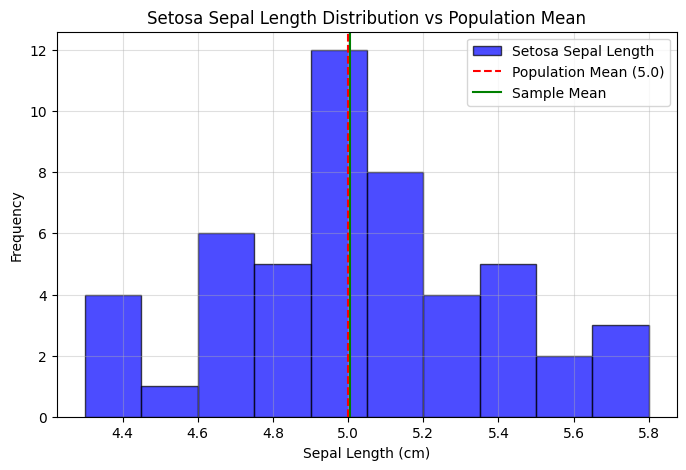

In [5]:
from statsmodels.stats.weightstats import ztest

# Z-Test for Sepal Length of Setosa
# Null Hypothesis: Mean Sepal Length = 5.0
population_mean = 5.0

# Extract sepal length for Setosa species
setosa_sepal_length = iris_data[iris_data['species'] == 'setosa']['sepal length (cm)']

# Perform the z-test (assuming population standard deviation is known or sample size > 30)
z_stat, p_value = ztest(setosa_sepal_length, value=population_mean)

# Print the z-test results
print(f"Z-Statistic: {z_stat:.2f}, P-Value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Sample mean is significantly different from population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Plot the sample distribution vs population mean
plt.figure(figsize=(8, 5))
plt.hist(setosa_sepal_length, bins=10, alpha=0.7, color='blue', edgecolor='black', label='Setosa Sepal Length')
plt.axvline(population_mean, color='red', linestyle='--', label=f'Population Mean ({population_mean})')
plt.axvline(np.mean(setosa_sepal_length), color='green', linestyle='-', label='Sample Mean')
plt.title('Setosa Sepal Length Distribution vs Population Mean')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


The **Z-Test** results for comparing the mean sepal length of Setosa to a population mean of 5.0 are:

**Z-Statistic: 0.12**
**P-Value: 0.904**


**Interpretation**:
Null Hypothesis: The mean sepal length of Setosa equals 5.0.

P-Value:The p-value (0.904) is much greater than the significance level (α=0.05).

We **fail to reject the null hypothesis**, meaning there is no significant difference between the sample mean sepal length of Setosa and the hypothetical population mean of 5.0.

**Visualization**:
The **red dashed line** represents the population mean (5.0).

The **green solid line** shows the sample mean for Setosa sepal lengths.

F-Statistic: 960.01, P-Value: 0.000
Reject the null hypothesis: At least one species has a significantly different mean petal width.


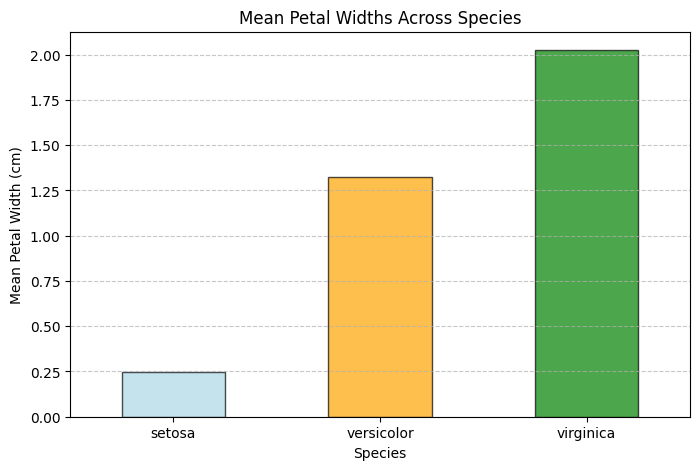

In [8]:
from scipy.stats import f_oneway

# Extract petal width data for each species
setosa_petal_width = iris_data[iris_data['species'] == 'setosa']['petal width (cm)']
versicolor_petal_width = iris_data[iris_data['species'] == 'versicolor']['petal width (cm)']
virginica_petal_width = iris_data[iris_data['species'] == 'virginica']['petal width (cm)']

# Perform one-way ANOVA
f_stat, p_value_anova = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

# Print results
print(f"F-Statistic: {f_stat:.2f}, P-Value: {p_value_anova:.3f}")
if p_value_anova < 0.05:
    print("Reject the null hypothesis: At least one species has a significantly different mean petal width.")
else:
    print("Fail to reject the null hypothesis: All species have similar mean petal widths.")

# Simpler visualization using a bar chart for mean petal widths
species_means = iris_data.groupby('species')['petal width (cm)'].mean()

# Bar chart for mean petal widths across species
plt.figure(figsize=(8, 5))
species_means.plot(kind='bar', color=['lightblue', 'orange', 'green'], edgecolor='black', alpha=0.7)
plt.title('Mean Petal Widths Across Species')
plt.xlabel('Species')
plt.ylabel('Mean Petal Width (cm)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**ANOVA**

F-Statistic: 960.01 P-Value: 0.000

**Decision**: Reject the null hypothesis, indicating significant differences in mean petal widths among species.

The bar chart provides a simple and clear visualization of the mean petal widths across the three species:

Setosa: Smallest mean petal width.
Versicolor: Intermediate mean petal width.
Virginica: Largest mean petal width.

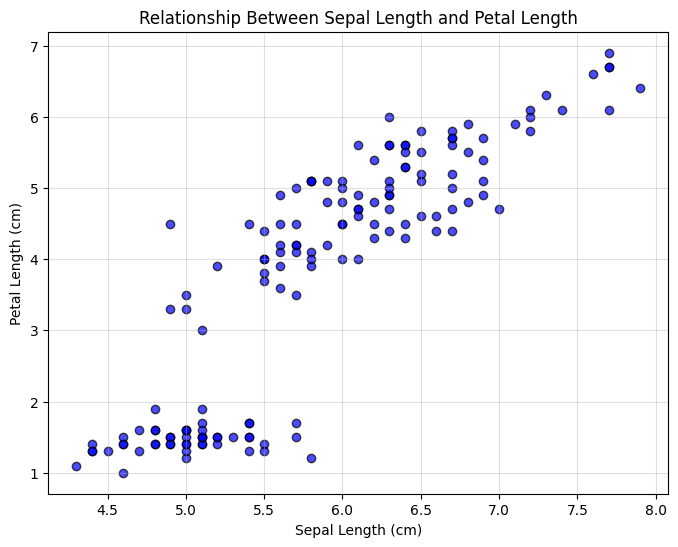

In [10]:
# Scatter plot to explore the relationship between sepal length and petal length
plt.figure(figsize=(8, 6))
plt.scatter(iris_data['sepal length (cm)'], iris_data['petal length (cm)'],
            c='blue', alpha=0.7, edgecolor='black')
plt.title('Relationship Between Sepal Length and Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(alpha=0.4)
plt.show()


**Correlation / Regrression**

The scatter plot visualizes the relationship between sepal length and petal length for the Iris dataset:

**Observation**:
A clear positive correlation is evident: as sepal length increases, petal length tends to increase as well. This suggests a proportional relationship between these two attributes.